# SVM: Separating hyperplane for unbalanced classes

Find the optimal separating hyperplane using an SVC for classes that are unbalanced.

In problems where it is desired to give more importance to certain classes or certain individual samples, the parameters __class_weight__ and __sample_weight__ can be used.

SVC implements the parameter __class_weight__ in the fit method. It’s a dictionary of the form {class_label : value}, where value is a floating point number > 0 that sets the parameter C of class __class_label__ to C * value.

The objective function for class-weighted SVM is as follows:
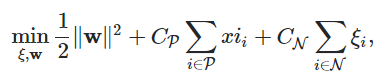
where the minority class uses a higher misclassification penalty. 


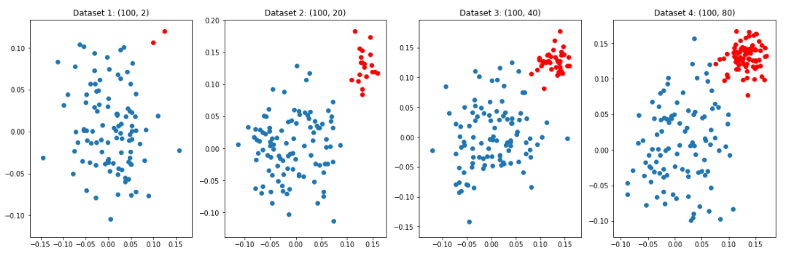

In [3]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

Automatically created module for IPython interactive environment


### Lets create 2 clusters of random points

This clusters will be our observations to classify.

In [4]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

### Lets fit the model and get the separating hyperplane

Using SVC function set the parameters:

- Kernel = linear <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo fence="false" stretchy="false">&#x27E8;</mo>
  <mi>x</mi>
  <mo>,</mo>
  <msup>
    <mi>x</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo fence="false" stretchy="false">&#x27E9;</mo>
</math>
- C = 1.0

In [5]:
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

SVC(kernel='linear')

### Lets repeat previous step but now using the __weighted classes__

Using SVC function set the parameters:

- Kernel = linear <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo fence="false" stretchy="false">&#x27E8;</mo>
  <mi>x</mi>
  <mo>,</mo>
  <msup>
    <mi>x</mi>
    <mo>&#x2032;</mo>
  </msup>
  <mo fence="false" stretchy="false">&#x27E9;</mo>
</math>
- C = 1.0
- Class_weight = {1:10}

In [6]:
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

SVC(class_weight={1: 10}, kernel='linear')

### Lets create the plots

We first find the separating plane with a plain SVC and then plot (dashed) the separating hyperplane with automatically correction for unbalanced classes.

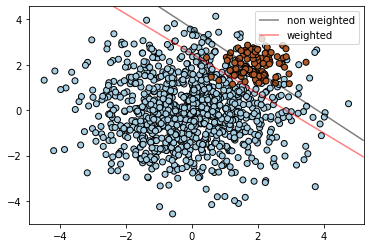

In [7]:
# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

The figure above illustrates the decision boundary of an unbalanced problem, with and without weight correction.

Note: This example will also work by replacing SVC(kernel="linear") with SGDClassifier(loss="hinge"). Setting the loss parameter of the SGDClassifier equal to hinge will yield behaviour such as that of a SVC with a linear kernel.
For example try instead of the SVC:

clf = SGDClassifier(n_iter=100, alpha=0.01)